Shallow Auto Encoder Example

In [2]:
import keras
from keras import layers

encoded_no = 32 #no of output of the encoder layer

#input image
input_img = keras.Input(shape=(784,))

#encoded representation of the input
#encoded_layer = layers.Dense(encoded_no, activation='relu')(input_img)

#adding the encoder layer with l1 regularization so that fewer neurons fire at a time for each training ephoc
encoded_layer = layers.Dense(encoded_no, activation='relu', activity_regularizer = keras.regularizers.l1(10e-5))(input_img)

#decoded representaion of the input
decoded_layer = layers.Dense(784, activation='sigmoid')(encoded_layer)

#creating a autoencoder model
autoencoder = keras.Model(input_img, decoded_layer)

#a seperated ecoder model
encoder = keras.Model(input_img, encoded_layer)

#a seperate decoder model
encoded_input = keras.Input(shape=(encoded_no,))
decoder_layer = autoencoder.layers[-1]

#creating a decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [3]:
#creating a model
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

#load the MNIST dataset
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

#normalize the dataset
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
#fitting the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=100,  #training ephoc can be increase after using the regularizer as the chances of overfitting decreses
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2884 - val_loss: 0.1993
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1793 - val_loss: 0.1625
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1539 - val_loss: 0.1441
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1389 - val_loss: 0.1319
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1288 - val_loss: 0.1236
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1217 - val_loss: 0.1176
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1167 - val_loss: 0.1134
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1130 - val_loss: 0.1103
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1105 - val_loss: 0.1082
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1087 - val_lo

In [5]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 657us/step


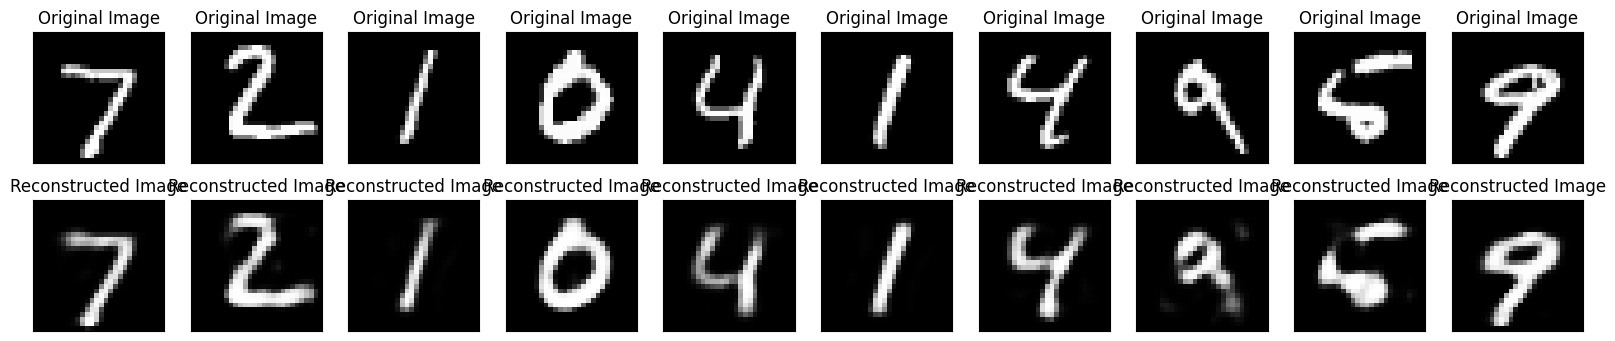

In [6]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('Original Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Reconstructed Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()